## PROJECT : SENTIMENT ANALYSIS ON TWEETS 

### Objective :

The goal is to classify tweets into 3 categories:

* Positive → tweets with happy/positive opinions

* Negative → tweets with complaints or bad experiences

* Neutral → tweets that are neither positive nor negative

This helps businesses (like airlines in this dataset) understand customer feedback at scale instead of reading thousands of tweets manually.

The dataset has tweets about airlines with columns like:

* text → actual tweet text (main input for our model)

* airline_sentiment → the label (positive, negative, neutral)

* airline → which airline the tweet is about

* retweet_count → number of retweets

* negativereason → why the user is negative (delay, service, etc.)

👉 For our project, the main columns we’ll use are:

* text (input feature)

* airline_sentiment (target/output)

Dataset : https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

## STEP 1 : IMPORT LIBRARIES

In [1]:
# Data handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2 : TEXT PREPROCESSING 

In [2]:
import re
import string

### NOTE : re (Regular Expressions)  : 

Python’s regex module used for text cleaning.

In NLP, tweets often contain unwanted parts like:

* URLs (https://...)

* Mentions (@username)

* Hashtags (#topic)

* Numbers (12345)

* Special symbols ($%^&*)

👉 With re, we can find and remove these patterns.

### NOTE : string

* Python’s string module has helpful constants like string.punctuation.

* Useful to remove punctuation marks (.,!?;:' etc.) from tweets.

## STEP 3 : LOAD THE DATASET

In [ ]:
# Load dataset
df = pd.read_csv('/Users/b.tejateja/Downloads/Twitter_Data/Tweets.csv')

# Check data
print(df.head())

In [4]:
print(df['airline_sentiment'].value_counts())

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


## STEP 4 : CLEAN THE TEXT

In [5]:
def clean_text(text):
    text = str(text).lower()  
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)                  # remove mentions/hashtags
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    return text.strip()

df['cleaned_text'] = df['text'].apply(clean_text)

## STEP 5 : FEATURES AND LABLES

In [6]:
X = df['cleaned_text']           # Independent variable (tweets)
y = df['airline_sentiment']      # Target variable (positive/negative/neutral)

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## STEP 6 : TRAIN TEST SPLIT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## STEP 7 : VECTORIZATION (TF-IDF[Term Frequency – Inverse Document Frequency])

In [9]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## STEP 8 : TRAIN THE MODEL

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## STEP 9 : EVALUATE THE MODEL 

In [11]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.805327868852459

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.93      0.88      1889
     neutral       0.68      0.54      0.60       580
    positive       0.82      0.62      0.70       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928



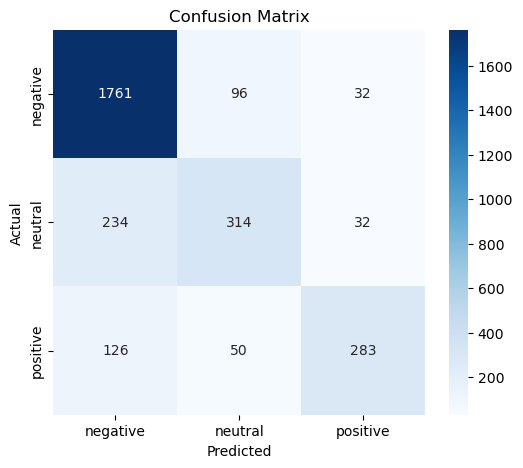

In [12]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## STEP 10 : PREDICT NEW TWEETS 

In [13]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vect = tfidf.transform([cleaned])
    return model.predict(vect)[0]

print(predict_sentiment("I love flying with this airline!"))   # positive
print(predict_sentiment("Worst flight experience ever 😡"))    # negative
print(predict_sentiment("It was okay, nothing special."))      # neutral
print(predict_sentiment("not so bad but good enough"))

positive
negative
negative
negative


## Next Steps After Preprocessing :

### Step 1: Convert text into numbers (Vectorization) :

Since ML models can’t read plain text, we need to convert tweets into numeric features.
We’ll use either:

* TF-IDF (Term Frequency – Inverse Document Frequency)

* Or Bag of Words

NOTE :Why do we convert text into numbers again?

After cleaning, we still have sentences/words, like:
"flight delayed terrible service"

But ML models (Logistic Regression, Random Forest, SVM, etc.) cannot directly understand words.
They only work with numerical feature vectors.

NOTE : So what does TF-IDF (or Bag of Words) do?

It converts sentences → numbers:

Suppose we have 3 tweets:

* "flight delayed terrible service"

* "great staff friendly flight"

* "average experience nothing special"

Bag of Words / TF-IDF builds a vocabulary:
[flight, delayed, terrible, service, great, staff, friendly, average, experience, nothing, special]

Each tweet becomes a vector of word frequencies/importance:

* Tweet 1 → [1,1,1,1,0,0,0,0,0,0,0]

* Tweet 2 → [1,0,0,0,1,1,1,0,0,0,0]

* Tweet 3 → [0,0,0,0,0,0,0,1,1,1,1]

Now our text is numeric and ML models can process it.

### Before vectorization, we must apply cleaning to each tweet and store it in a new column :

In [14]:
import re
import string

# Function to clean text
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'@\w+|\#','', text)  # remove @mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.lower()  # lowercase
    return text

# Apply cleaning on "text" column (your dataset column with tweets)
df['clean_text'] = df['text'].apply(clean_tweet)

# Check first few rows
print(df[['text','clean_text']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                                         what  said  
1   plus youve added commercials to the experienc...  
2   i didnt today must mean i need to take anothe...  
3   its really aggressive to blast obnoxious ente...  
4            and its a really big bad thing about it  


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tweets to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])  # clean_text is the column after preprocessing
y = df['airline_sentiment']  # target column (positive, negative, neutral)


## STEP 2 : SPLIT THE DATA INTO TRAINING AND TESTING

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

## STEP 3 : TRAIN ML MODEL

We can try Logistic Regression first (simple but effective for text).

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## STEP 4 : EVALUATE THE MODEL 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.94      0.85      1835
     neutral       0.62      0.41      0.50       620
    positive       0.82      0.54      0.65       473

    accuracy                           0.76      2928
   macro avg       0.74      0.63      0.67      2928
weighted avg       0.76      0.76      0.75      2928

Confusion Matrix:
 [[1725   83   27]
 [ 335  257   28]
 [ 145   72  256]]


Classification Report :

Negative Tweets

* Precision: 0.78 → Out of all tweets predicted as negative, 78% were actually negative.

* Recall: 0.94 → The model correctly caught 94% of all real negative tweets.

* F1: 0.85 → Balance of precision & recall (very good 👍).

👉 Interpretation: Model is very strong at detecting negative tweets.

Neutral Tweets

* Precision: 0.62 → Out of all tweets predicted as neutral, only 62% were correct.

* Recall: 0.41 → It only identified 41% of actual neutral tweets.

* F1: 0.50 → Weak performance here.

👉 Interpretation: The model struggles with neutral tweets (common issue in sentiment analysis, because neutral is “in-between” positive & negative).

Positive Tweets

* Precision: 0.82 → When it predicts positive, it’s correct 82% of the time.

* Recall: 0.54 → But it only catches 54% of actual positive tweets.

* F1: 0.65 → Average performance.

👉 Interpretation: Model misses many positive tweets, but predictions it makes are mostly reliable.

✅ Overall (Accuracy = 76%)

* Out of ~3000 tweets, the model gets about 3 out of 4 correct.

* Weighted F1 = 0.75 → Pretty balanced performance overall.

✅ Confusion Matrix
 [[1725   83   27]
  [ 335  257   28]
  [ 145   72  256]]


* Row = actual sentiment, column = predicted sentiment.

Example:

* 1725 = correctly predicted negatives

* 335 neutral tweets misclassified as negative

* 145 positives misclassified as negative

👉 Confirms the model is very strong at detecting negatives, but confuses neutrals a lot.

#### Logistic Regression is good for a baseline, but other models may capture patterns better :

## STEP 1 : Try Different ML Models 

### Multinomial Naive Bayes  :

In [19]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


### Support Vector Classifier (SVC) : 

In [20]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)


### Random Forest :

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

    negative       0.79      0.91      0.85      1835
     neutral       0.60      0.45      0.51       620
    positive       0.72      0.54      0.62       473

    accuracy                           0.75      2928
   macro avg       0.70      0.63      0.66      2928
weighted avg       0.74      0.75      0.74      2928



## STEP 2 : Handle Class Imbalance 

Our dataset has many negatives and fewer positives/neutral → model favors negatives.

Solution: Use SMOTE (synthetic oversampling)

Insight: This improves recall for minority classes (positive/neutral tweets).

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now train model on X_train_res, y_train_res
nb_model.fit(X_train_res, y_train_res)
y_pred_smote = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      1835
     neutral       0.54      0.55      0.55       620
    positive       0.60      0.71      0.65       473

    accuracy                           0.74      2928
   macro avg       0.67      0.69      0.68      2928
weighted avg       0.75      0.74      0.75      2928



## STEP 3 : Hyperparameter Tuning 

Optimizing parameters often increases accuracy/F1.

Example: GridSearch for Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'C':[0.01, 0.1, 1, 10], 'solver':['lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
y_pred_best = grid.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Params: {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1835
     neutral       0.59      0.53      0.56       620
    positive       0.78      0.60      0.68       473

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.77      0.77      0.77      2928



## STEP 4 : Advanced Text Preprocessing 

Cleaner data = better model 

In [31]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 2.6 MB/s  0:00:00


In [33]:
# Remove emojis or convert to text: 

import emoji
def convert_emoji(text):
    return emoji.demojize(text)

# Example
text = "I love Python 😍"
print(convert_emoji(text))

I love Python :smiling_face_with_heart-eyes:


In [35]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [contractions]


In [36]:
# Expand contractions: "don't" → "do not"

import contractions
text = contractions.fix("don't like this")


## STEP 5 : Visualize Insights

Helps understand frequent words and patterns

In [39]:
!pip install wordcloud

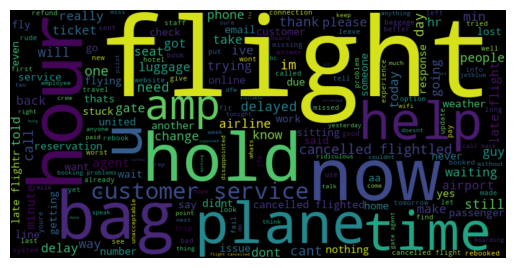

In [40]:
# WordCloud:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df[df['airline_sentiment']=='negative']['clean_text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# Bar plot of top words :

from collections import Counter
words = " ".join(df['clean_text']).split()
Counter(words).most_common(10)


[('to', 8640),
 ('the', 6051),
 ('i', 5373),
 ('a', 4477),
 ('you', 4105),
 ('for', 3991),
 ('flight', 3870),
 ('on', 3778),
 ('and', 3709),
 ('my', 3273)]

Insight: Shows which words dominate each sentiment → useful for business analysis.

## STEP 6 : SAVE THE MODEL

In [44]:
# After training the best model:

import pickle

# Example: Saving Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

#Saves your trained model to a file.Streamlit will load this file for predictions.

## STEP 7 : DEPLOY WITH STREAMLIT